In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
palette=sns.color_palette('Set2')

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Research/mashroom edibility/MushroomDataset/secondary_data.csv")

In [4]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


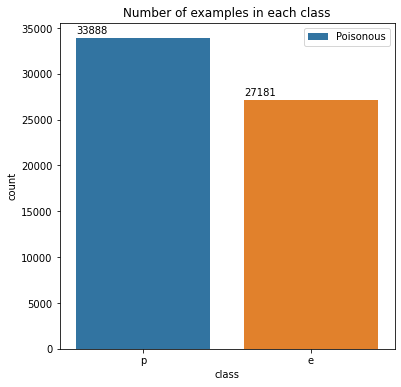

In [5]:
plt.figure(figsize=(6,6))
plt.title('Number of examples in each class')
g = sns.countplot(x='class', data=data)
    
plt.legend(labels=["Poisonous","Edible"])
    #_ = plt.setp(g.get_xticklabels(), rotation=90)  # Rotate labels


for p in g.patches:
         txt = str(p.get_height().round(1)) 
         txt_x = p.get_x() 
         txt_y = p.get_height()+ 500
         g.text(txt_x,txt_y,txt)

In [6]:
def plot_nested_countplot(data, label, feature, fsize=(6,6), title_ ="", labels_ = None): 
    plt.figure(figsize=fsize)
    temp = (data.groupby(label)[feature]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     )
    g = sns.barplot(x=feature, y="percentage", hue=label, data=temp)
    
    if(labels_ == None):
        plt.legend(labels=data[label].unique())
    else:
        plt.legend(labels=labels_)
    #_ = plt.setp(g.get_xticklabels(), rotation=90)  # Rotate labels
    plt.title(title_)

    for p in g.patches:
         txt = str(p.get_height().round(1)) + '%'
         txt_x = p.get_x() 
         txt_y = p.get_height()+1
         g.text(txt_x,txt_y,txt)

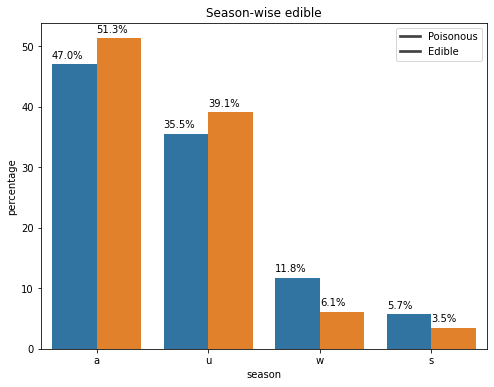

In [7]:
plot_nested_countplot(data=data, label='class', feature='season', 
                      fsize = (8,6),
                      title_='Season-wise edible', 
                      labels_=['Poisonous', 'Edible'])

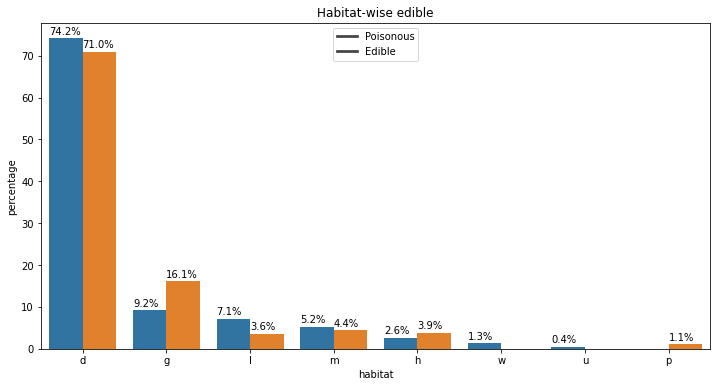

In [8]:
plot_nested_countplot(data=data, label='class', feature='habitat', 
                      fsize = (12,6),
                      title_='Habitat-wise edible', 
                      labels_=['Poisonous', 'Edible'])

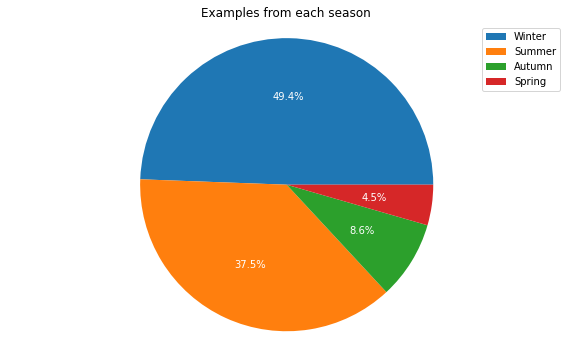

In [9]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(data['season'].value_counts(), labels=['Winter', 'Summer', 'Autumn', 'Spring'], autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.title('Examples from each season')
plt.show()

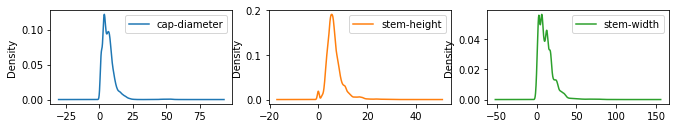

In [11]:
## Density plot
# It is abstracted histogram with smooth curve. 
data.plot(kind='density', subplots=True, layout=(5,4), sharex=False)
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

In [12]:
def categorical_data_labeling_with_missing_value(df, not_categorical_col):

  labels = {}
  df = df.fillna(0)
  for col in df.columns:
    if col not in not_categorical_col:
      dic_col = {} 
      unq = df[col].unique()
      if 0 in unq:
        dic_col['NaN'] = 0
        unq = np.delete(unq, np.where(unq==0))
      #print(unq)
      for i in range(len(unq)):
        df[col] = df[col].replace(unq[i], i+1)
        dic_col[unq[i]] = i+1;
      labels[col] = dic_col;
  return df, labels

In [13]:
not_categorical_col = ['cap-diameter', 'stem-height', 'stem-width' ]
df, category_labels = categorical_data_labeling_with_missing_value(data, not_categorical_col)

In [14]:
print(category_labels)

{'class': {'p': 1, 'e': 2}, 'cap-shape': {'x': 1, 'f': 2, 'p': 3, 'b': 4, 'c': 5, 's': 6, 'o': 7}, 'cap-surface': {'NaN': 0, 'g': 1, 'h': 2, 't': 3, 'y': 4, 'e': 5, 's': 6, 'l': 7, 'd': 8, 'w': 9, 'i': 10, 'k': 11}, 'cap-color': {'o': 1, 'e': 2, 'n': 3, 'g': 4, 'r': 5, 'w': 6, 'y': 7, 'p': 8, 'u': 9, 'b': 10, 'l': 11, 'k': 12}, 'does-bruise-or-bleed': {'f': 1, 't': 2}, 'gill-attachment': {'NaN': 0, 'e': 1, 'a': 2, 'd': 3, 's': 4, 'x': 5, 'p': 6, 'f': 7}, 'gill-spacing': {'NaN': 0, 'c': 1, 'd': 2, 'f': 3}, 'gill-color': {'w': 1, 'n': 2, 'p': 3, 'u': 4, 'b': 5, 'g': 6, 'y': 7, 'r': 8, 'e': 9, 'o': 10, 'k': 11, 'f': 12}, 'stem-root': {'NaN': 0, 's': 1, 'b': 2, 'r': 3, 'c': 4, 'f': 5}, 'stem-surface': {'NaN': 0, 'y': 1, 's': 2, 'k': 3, 'i': 4, 'h': 5, 't': 6, 'g': 7, 'f': 8}, 'stem-color': {'w': 1, 'y': 2, 'n': 3, 'u': 4, 'b': 5, 'l': 6, 'r': 7, 'p': 8, 'e': 9, 'k': 10, 'g': 11, 'o': 12, 'f': 13}, 'veil-type': {'NaN': 0, 'u': 1}, 'veil-color': {'NaN': 0, 'w': 1, 'y': 2, 'n': 3, 'e': 4, 'u'

In [15]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,1,1,1,1,1,0,1,16.95,...,1,1,1,1,1,1,1,0,1,1
1,1,16.60,1,1,1,1,1,0,1,17.99,...,1,1,1,1,1,1,1,0,1,2
2,1,14.07,1,1,1,1,1,0,1,17.80,...,1,1,1,1,1,1,1,0,1,1
3,1,14.17,2,2,2,1,1,0,1,15.77,...,1,1,1,1,1,1,2,0,1,1
4,1,14.64,1,2,1,1,1,0,1,16.53,...,1,1,1,1,1,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,1.18,6,6,7,1,7,3,12,3.93,...,0,0,2,0,0,2,5,0,1,3
61065,1,1.27,2,6,7,1,7,3,12,3.18,...,0,0,2,0,0,2,5,0,1,3
61066,1,1.27,6,6,7,1,7,3,12,3.86,...,0,0,2,0,0,2,5,0,1,2
61067,1,1.24,2,6,7,1,7,3,12,3.56,...,0,0,2,0,0,2,5,0,1,2


In [16]:
df['class'].value_counts()

1    33888
2    27181
Name: class, dtype: int64

In [17]:
X = df.drop(columns=['class'])
X.shape

(61069, 20)

In [18]:
y = df['class']
y.shape

(61069,)

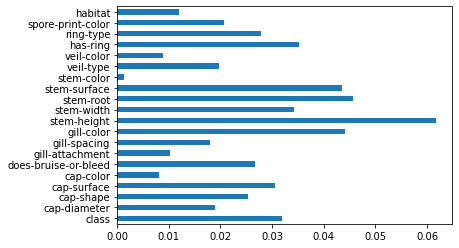

In [19]:
# Information Gain Selection 

from sklearn.feature_selection import mutual_info_classif 
import matplotlib.pyplot as plt
%matplotlib inline 

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh')
plt.show()

[0.09467513 0.08850774 0.08081324 0.07656536 0.07233914 0.06507228
 0.06289545 0.05635045 0.05552154 0.04948913 0.04720562 0.03979729
 0.03787608 0.03206775 0.03108008 0.03034105 0.02588364 0.02355064
 0.01724253 0.01272588]

 Top  20 features :

{'gill-attachment': 0.09467512957955346, 'cap-surface': 0.08850773894236749, 'gill-spacing': 0.08081323504202347, 'stem-surface': 0.07656536041793463, 'stem-color': 0.07233913568905645, 'gill-color': 0.06507228195615576, 'stem-width': 0.06289544822071132, 'stem-root': 0.056350453263118376, 'cap-shape': 0.05552153788896965, 'cap-diameter': 0.04948912693382345, 'cap-color': 0.04720561821660026, 'stem-height': 0.039797289735675825, 'does-bruise-or-bleed': 0.03787607793855528, 'habitat': 0.03206775171274057, 'ring-type': 0.031080084534052935, 'has-ring': 0.03034104842917516, 'spore-print-color': 0.025883639917725937, 'veil-color': 0.023550636051393452, 'season': 0.01724252595650485, 'veil-type': 0.012725879573861626}


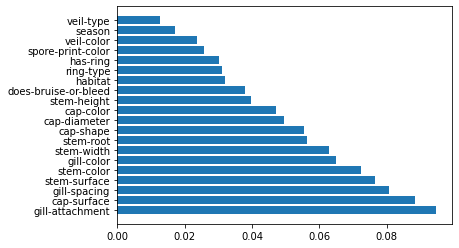

In [20]:
## calculate importance of each feature using a specific classifier 

from sklearn.ensemble import ExtraTreesClassifier 

clf = ExtraTreesClassifier().fit(X, y)
#print(clf.feature_importances_)

num_top_feature = 20
import numpy as np 
sorted_idx = np.argsort(np.array(clf.feature_importances_))[::-1][:num_top_feature]
sorted_imp = clf.feature_importances_[sorted_idx]
print(sorted_imp)
#print(sorted_idx)

print('\n Top ', num_top_feature,'features :\n')

important_features = {}
for i in range(len(sorted_idx)):
    important_features[X.columns[sorted_idx[i]]] = sorted_imp[i]

print(important_features)


plt.barh(range(len(important_features)), important_features.values(), align='center')
#plt.xticks(range(len(important_features)), list(important_features.keys()))
plt.yticks(range(len(important_features)), list(important_features.keys()))

plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)
print("Train Set: \n", y_train.value_counts())
print("Test Set: \n", y_test.value_counts())

Train Set: 
 1    25444
2    20357
Name: class, dtype: int64
Test Set: 
 1    8444
2    6824
Name: class, dtype: int64


In [50]:
## k-fold cross validation allows different sampling of train and test set that gives the more accurate evaluaiton of the model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits = 10, random_state = 8, shuffle=True)

clf2 = KNeighborsClassifier(3)
results = cross_val_score(clf2, X, y, cv=kfold, scoring='accuracy')

print("==== Accuracy =====")
print("Accuracy for each fold: \n", results)
print("Avg. accuracy = \t",results.mean()*100.0, "\n Standard Deviation = \t", results.std()*100.0)



==== Accuracy =====
Accuracy for each fold: 
 [0.99967251 0.99950876 1.         1.         0.99967251 0.99950876
 0.99983625 1.         1.         1.        ]
Avg. accuracy = 	 99.9819878827575 
 Standard Deviation = 	 0.019987810079800633


In [51]:
## AUC is used for binary classification 
print("==== AUC =====")
results = cross_val_score(clf2, X, y, cv=kfold, scoring='roc_auc')
print("AUC for each fold: \n", results)
print("Avg. AUC = \t",results.mean()*100.0, "\n Standard Deviation = \t", results.std()*100.0)

==== AUC =====
AUC for each fold: 
 [0.99984967 0.99981937 1.         1.         0.99981429 0.99962947
 0.99999995 1.         1.         1.        ]
Avg. AUC = 	 99.9911274049922 
 Standard Deviation = 	 0.012177320844816594


In [26]:
# testing the unknown data with KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Poisonous', 'Edible']
cm = classification_report(y_test, y_pred, target_names=target_names)
print(cm)

              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00      8444
      Edible       1.00      1.00      1.00      6824

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



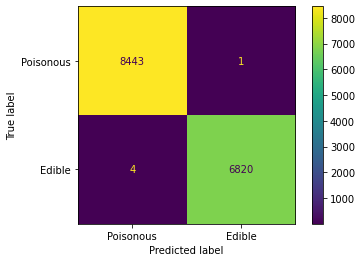

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poisonous', 'Edible'])
disp.plot()
plt.show()